In [1]:
# Clustering algorithms
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.cluster.vq import vq, kmeans, whiten

# Data Manipulation
import matplotlib.pyplot as plt, numpy as np

# Word pre-proccesing for NLP
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Visualization
import seaborn as sns, pandas as pd

In [2]:
# Generate Random Data
np.random.seed = 10
x_coord = whiten(np.random.rand(50) * 10)
y_coord = whiten(np.random.rand(50) * 10)

# Build DataFrame
df = pd.DataFrame({'x': x_coord, 'y': y_coord})
df.head()

,x,y
0,0.279607,1.955477
1,0.507669,1.185429
2,1.963531,2.612321
3,0.971753,0.233051
4,1.243303,0.699140


In [3]:
# Calculate linkage matrix with 'ward' method
distance_matrix = linkage(df, method='ward')

# Add clustered column with new label
df['hierarchy'] = fcluster(distance_matrix, 3, criterion='maxclust')

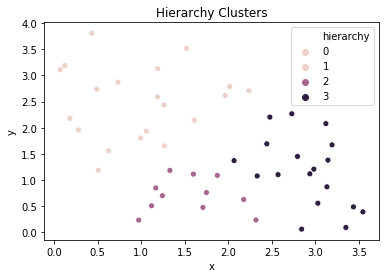

In [4]:
# Visualize Hierarchy Clusters
sns.scatterplot(x='x', y='y', hue='hierarchy', data=df)
plt.title('Hierarchy Clusters')
plt.show()

In [5]:
# Calculate Centroids with kmeans and add labels to df
centroids, distortion = kmeans(df, 3)
df['kmeans'], df['distortion'] = vq(df, centroids)

# Mean centroids in k-means
df[['x', 'y', 'kmeans']].groupby('kmeans').mean()

,x,y
kmeans,,
0,2.895192,1.170383
1,1.568815,0.706592
2,1.090818,2.549124


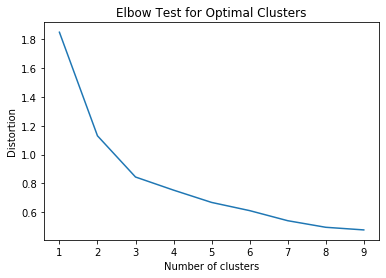

In [6]:
# Elbow method to determine optimal number of clusters
num_clusts = range(1, 10)
distortions = [kmeans(df, i)[1] for i in num_clusts]
sns.lineplot(num_clusts, distortions)
plt.title('Elbow Test for Optimal Clusters')
plt.ylabel('Distortion')
plt.xlabel('Number of clusters')
plt.show()

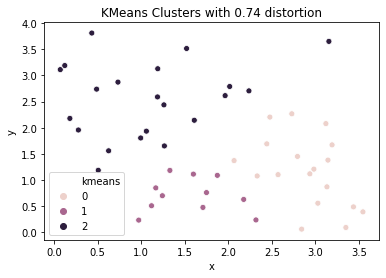

In [7]:
# Visualize Kmeans Clusters
sns.scatterplot(x='x', y='y', hue='kmeans', data=df)
plt.title(f'KMeans Clusters with {round(distortion, 2)} distortion')
plt.show()


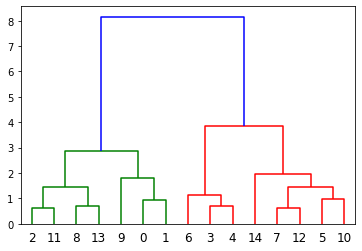

In [8]:
# Dendrograms are used visualizations to predict optimal number of clusters
distance_matrix = linkage(df.head(15), method='ward', metric='euclidean')
dn = dendrogram(distance_matrix)
plt.show()